In [106]:
import pandas as pd
import sklearn.ensemble
import numpy as np
import matplotlib.pyplot as plt

In [11]:
data=pd.read_csv("energydata_complete.csv")

In [193]:
data['timeofday']=data['date']
for index in range(0,19735):
    data.loc[index,'timeofday']=int(data.loc[index,'timeofday'][11:13])*60+int(data.loc[index,'timeofday'][14:16])
data

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,timeofday
0,2016-01-11 17:00:00,60,30,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,...,45.530000,6.600000,733.500000,92.000000,7.000000,63.000000,5.300000,13.275433,13.275433,1020
1,2016-01-11 17:10:00,60,30,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,...,45.560000,6.483333,733.600000,92.000000,6.666667,59.166667,5.200000,18.606195,18.606195,1030
2,2016-01-11 17:20:00,50,30,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,...,45.500000,6.366667,733.700000,92.000000,6.333333,55.333333,5.100000,28.642668,28.642668,1040
3,2016-01-11 17:30:00,50,40,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,...,45.400000,6.250000,733.800000,92.000000,6.000000,51.500000,5.000000,45.410389,45.410389,1050
4,2016-01-11 17:40:00,60,40,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,...,45.400000,6.133333,733.900000,92.000000,5.666667,47.666667,4.900000,10.084097,10.084097,1060
5,2016-01-11 17:50:00,50,40,19.890000,46.026667,19.200000,44.500000,19.790000,44.933333,18.890000,...,45.290000,6.016667,734.000000,92.000000,5.333333,43.833333,4.800000,44.919484,44.919484,1070
6,2016-01-11 18:00:00,60,50,19.890000,45.766667,19.200000,44.500000,19.790000,44.900000,18.890000,...,45.290000,5.900000,734.100000,92.000000,5.000000,40.000000,4.700000,47.233763,47.233763,1080
7,2016-01-11 18:10:00,60,50,19.856667,45.560000,19.200000,44.500000,19.730000,44.900000,18.890000,...,45.290000,5.916667,734.166667,91.833333,5.166667,40.000000,4.683333,33.039890,33.039890,1090
8,2016-01-11 18:20:00,60,40,19.790000,45.597500,19.200000,44.433333,19.730000,44.790000,18.890000,...,45.290000,5.933333,734.233333,91.666667,5.333333,40.000000,4.666667,31.455702,31.455702,1100
9,2016-01-11 18:30:00,70,40,19.856667,46.090000,19.230000,44.400000,19.790000,44.863333,18.890000,...,45.290000,5.950000,734.300000,91.500000,5.500000,40.000000,4.650000,3.089314,3.089314,1110


In [176]:
data.describe()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,...,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,...,19.485828,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,...,2.014712,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,...,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,...,18.000000,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,...,19.390000,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,...,20.600000,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,...,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530


In [177]:
y=data.loc[:,'Appliances']
x=data.iloc[:,2:]

In [56]:
rf.fit(x,y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=4, max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [58]:
yhat=rf.predict(x)

In [65]:
np.mean(np.square(yhat-y))

586.3899903724335

In [198]:
ytrain=data.iloc[:13801,1]
xtrain=data.iloc[:13801,2:]
ytest=data.iloc[13801:,1]
xtest=data.iloc[13801:,2:]
samplemse=[]
testmse=[]
for N in range(100,200,10):
    rf=sklearn.ensemble.RandomForestRegressor(n_estimators=N,max_features=6,max_leaf_nodes=8)
    rf.fit(xtrain,ytrain)
    yhat=rf.predict(xtrain)
    samplemse.append(np.mean(np.square(yhat-ytrain)))
    yhat=rf.predict(xtest)
    testmse.append(np.mean(np.square(yhat-ytest)))

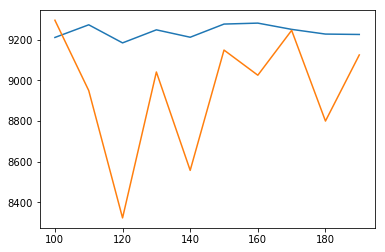

In [199]:
plt.figure()
plt.plot(range(100,200,10),samplemse)
plt.plot(range(100,200,10),testmse)
plt.show()

In [200]:
rf.feature_importances_

array([ 0.18127677,  0.01339165,  0.02021495,  0.03597285,  0.02249417,
        0.10664922,  0.02435223,  0.00600188,  0.00813945,  0.01892638,
        0.01723795,  0.01328401,  0.02610237,  0.00978881,  0.01029587,
        0.02221996,  0.02295196,  0.0173126 ,  0.00703941,  0.00684772,
        0.01135549,  0.04909746,  0.00690476,  0.00037175,  0.00231525,
        0.        ,  0.        ,  0.33945511])

In [201]:
xtest

,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,...,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,timeofday
13801,0,22.533333,44.066667,22.230000,40.860000,24.666667,39.163333,21.790000,39.856000,20.890000,...,43.200000,10.433333,747.116667,70.000000,5.000000,40.000000,5.116667,7.381873,7.381873,790
13802,10,22.600000,43.966667,22.290000,41.000000,24.533333,39.163333,21.875714,39.884286,20.890000,...,43.200000,10.566667,747.133333,70.000000,5.000000,40.000000,5.233333,28.606638,28.606638,800
13803,0,22.600000,43.900000,22.260000,41.156667,24.445000,39.090000,21.912000,40.140000,20.890000,...,43.163333,10.700000,747.150000,70.000000,5.000000,40.000000,5.350000,10.927166,10.927166,810
13804,0,22.600000,44.160000,22.133333,41.490000,24.463333,39.193333,21.952857,40.500000,20.890000,...,42.963333,10.833333,747.166667,70.000000,5.000000,40.000000,5.466667,44.747026,44.747026,820
13805,0,22.600000,43.633333,22.100000,41.590000,24.323333,39.000000,22.000000,40.475000,20.890000,...,42.633333,10.966667,747.183333,70.000000,5.000000,40.000000,5.583333,16.870027,16.870027,830
13806,0,22.600000,44.930000,22.033333,41.796667,24.393333,39.600000,22.100000,40.356000,20.890000,...,42.226667,11.100000,747.200000,70.000000,5.000000,40.000000,5.700000,36.403514,36.403514,840
13807,0,22.600000,45.063333,21.963333,42.360000,24.726667,40.466667,22.100000,40.251429,20.890000,...,42.126667,10.966667,747.266667,69.666667,4.833333,37.833333,5.516667,13.686350,13.686350,850
13808,0,22.500000,45.440000,21.890000,42.633333,25.066667,41.266667,22.100000,40.196000,20.890000,...,42.126667,10.833333,747.333333,69.333333,4.666667,35.666667,5.333333,30.561675,30.561675,860
13809,0,22.500000,45.663333,21.760000,42.860000,25.260000,41.526667,22.100000,39.897143,20.890000,...,41.930000,10.700000,747.400000,69.000000,4.500000,33.500000,5.150000,9.525742,9.525742,870
13810,0,22.500000,45.723333,21.700000,43.133333,25.500000,41.590000,22.040000,39.634000,20.890000,...,41.730000,10.566667,747.466667,68.666667,4.333333,31.333333,4.966667,18.934133,18.934133,880
